In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Read the video and first frame
# cap = cv2.VideoCapture('vtest.avi')
# re, old_frame = cap.read()
old_frame=cv2.imread('satimg/SAT202111111345.jpg')
new_frame=cv2.imread('satimg/SAT202111111615.jpg')

old_frame_hsv=cv2.cvtColor(old_frame,cv2.COLOR_BGR2HSV)
new_frame_hsv=cv2.cvtColor(new_frame,cv2.COLOR_BGR2HSV)
# define blue color range
yellow1=np.array([0, 150, 150])
yellow2=np.array( [10, 255, 255])
# Threshold the HSV image to get only blue colors
mask = cv2.inRange(old_frame, yellow1, yellow2)
# Bitwise-AND mask and original image
old_frame_color = cv2.bitwise_and(old_frame_hsv,old_frame_hsv, mask= mask)
new_frame_color = cv2.bitwise_and(new_frame_hsv,new_frame_hsv, mask= mask)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(old_frame_color,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(new_frame_color,cv2.COLOR_BGR2RGB))
old_frame=old_frame_color
new_frame=new_frame_color

In [ ]:
# crate HSV & make Value a constant
hsv = np.zeros_like(old_frame)
hsv[..., 1] = 255
# Preprocessing for exact method
old_frame1 = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
# Read the next frame
# ret, new_frame = cap.read()
frame_copy = new_frame

# Preprocessing for exact method
new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
# Calculate Optical Flow
flow = cv2.calcOpticalFlowFarneback(old_frame1,new_frame,None,0.5, 3, 15, 3, 5, 1.2, 0)

# Encoding: convert the algorithm's output into Polar coordinates
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
# Use Hue and Value to encode the Optical Flow
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
# Convert HSV image into BGR for demo
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(old_frame,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(frame_copy,cv2.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB))
# cv2.imshow("frame", frame_copy)
# cv2.imshow("optical flow", bgr)
# k = cv2.waitKey(25) & 0xFF

# # Update the previous frame
# old_frame = new_frame

In [ ]:
cap = cv2.VideoCapture('vtest.avi')
# Parameters for ShiTomasi corner detection
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
# Parameters for Lucas Kanade optical flow
lk_params = dict(winSize=(15, 15),  maxLevel=2,criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create random colors
color = np.random.randint(0, 255, (100, 3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
# Read new frame
ret, frame = cap.read()
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# Calculate Optical Flow
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params )
p0=p0.astype('int')
p1=p1.astype('int')

# Select good points
good_new = p1[st == 1]
good_old = p0[st == 1]
# Draw the tracks
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
   
    c, d = old.ravel()

    mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(),2)
    frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)

# Display the demo
img = cv2.add(frame, mask)
plt.imshow(img)


In [ ]:
import os
dir='D:/University/PythonProjects/satimg/'
file_list=os.listdir(dir)
i=0
while(i<10):
    i+=1
    print(dir+file_list[i])
    a=cv2.imread(dir+file_list[i])
    plt.imshow(a)


In [ ]:



cap = cv2.VideoCapture('vtest.avi')

# Parameters for ShiTomasi corner detection
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
# Parameters for Lucas Kanade optical flow


# Create random colors
color = np.random.randint(0, 255, (100, 3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
# old_frame=cv2.imread(dir+file_list[0])
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

In [ ]:

while(1):
    
    # Read new frame 
    ret, frame = cap.read()
#     frame=cv2.imread(dir+file_list[i])
#     print(dir+file_list[i])
    if not ret:
            break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    lk_params = dict(winSize=(15, 15),  maxLevel=2,criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    cv2.calcOpticalFlowFarneback()
   
 
    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]
    # Draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a),int(b)), 5, color[i].tolist(), -1)
    # Display the demo
    img = cv2.add(frame, mask)
    cv2.imshow("frame", img)
    k = cv2.waitKey(25) & 0xFF
    if k == 27:
        break
    # Update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)


In [2]:
def compute_dense_optical_flow(prev_image, current_image):
    old_shape = current_image.shape
    prev_image_gray = cv2.cvtColor(prev_image, cv2.COLOR_BGR2GRAY)
    current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    assert current_image.shape == old_shape
    hsv = np.zeros_like(prev_image)
    hsv[..., 1] = 255
    flow = None
    flow = cv2.calcOpticalFlowFarneback(prev=prev_image_gray,
                                      next=current_image_gray, flow=flow,
                                      pyr_scale=0.8, levels=15, winsize=5,
                                      iterations=10, poly_n=5, poly_sigma=0,
                                      flags=10)

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR) 

In [4]:
prev_image=cv2.imread('satimg/SAT202111111345.jpg')
current_image=cv2.imread('satimg/SAT202111111615.jpg')
img=compute_dense_optical_flow(prev_image, current_image)

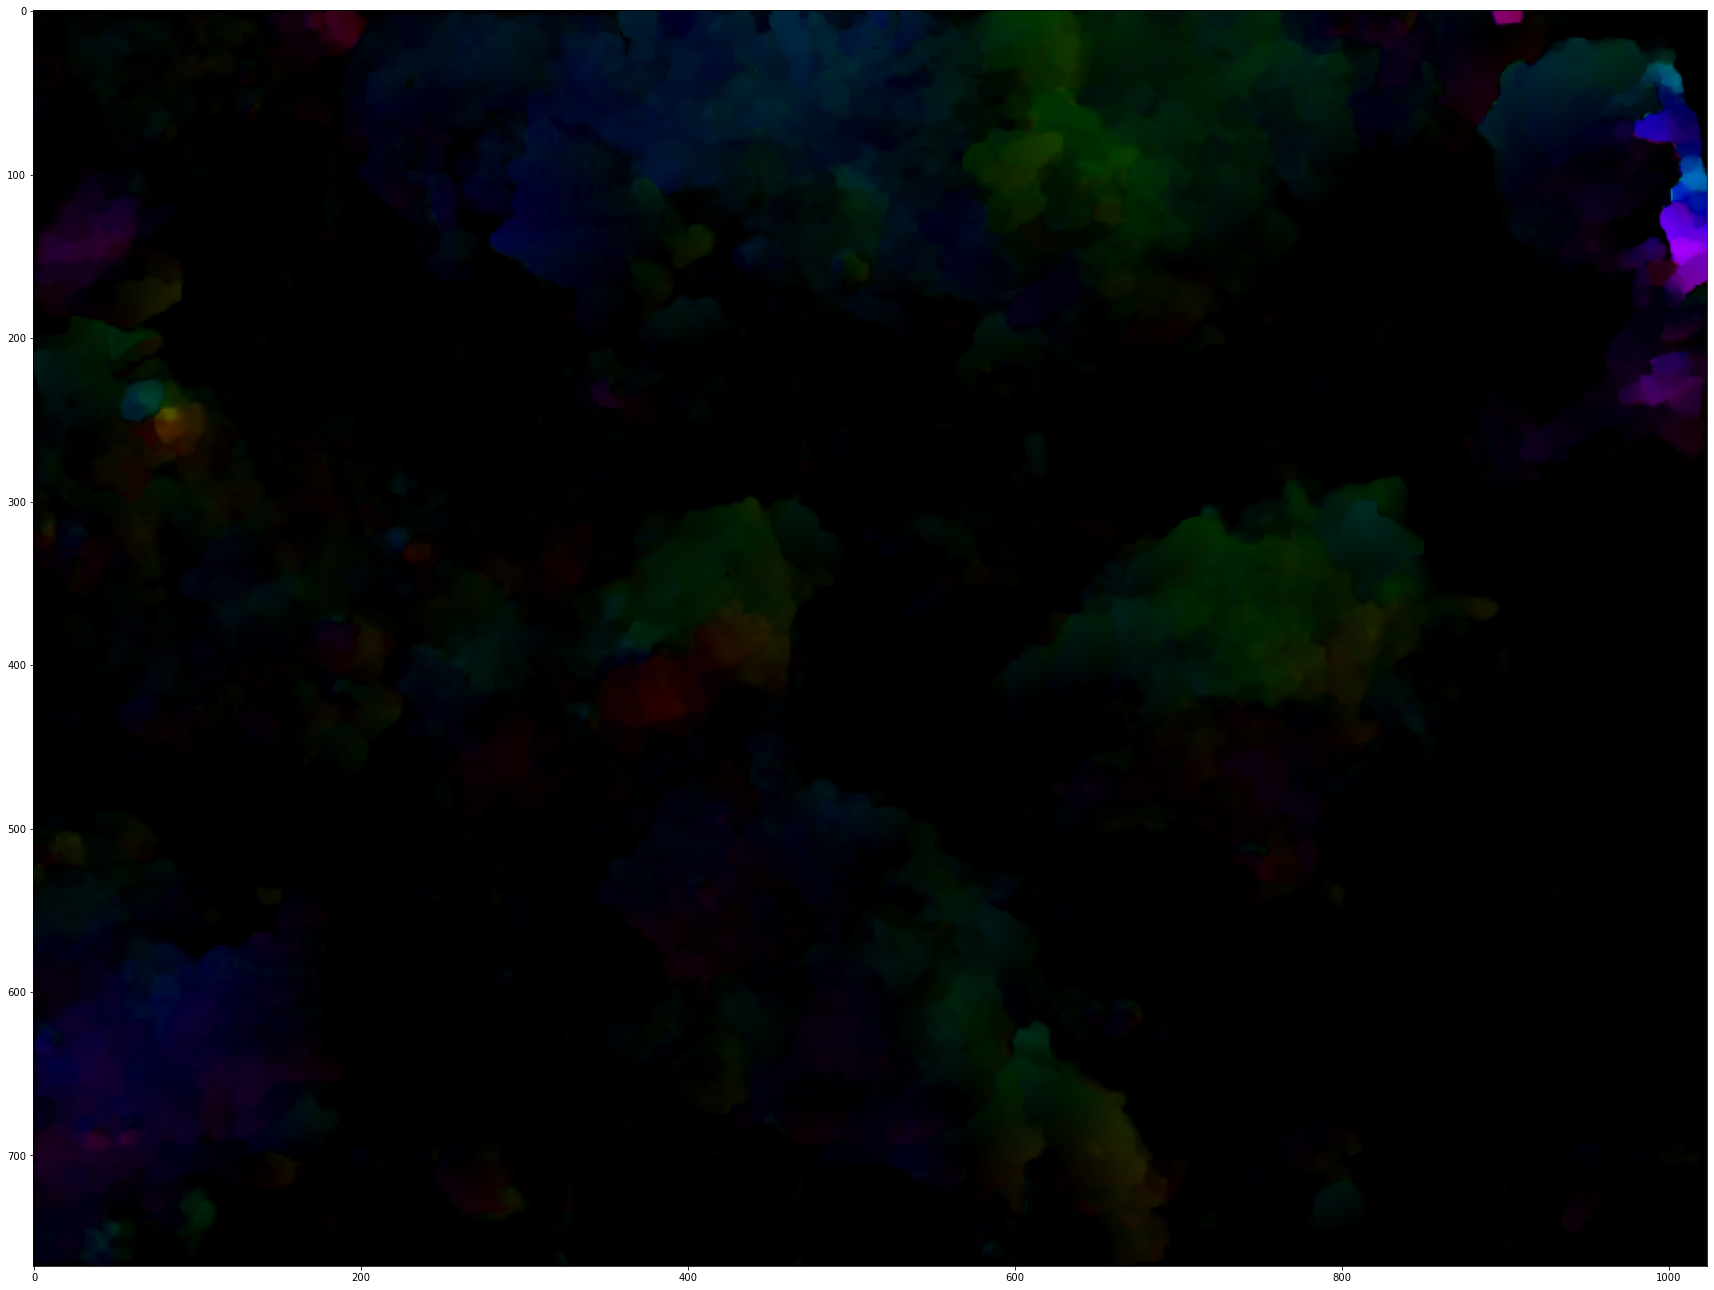

In [6]:
plt.figure(figsize=(30,30))
plt.imshow(img)